In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)

from decode_learning_effect import StorageManager, SessionInfo, make_session_info
import numpy as np

2022-10-23 16:21:34.898763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 16:21:35.170508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-23 16:21:35.170536: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-23 16:21:35.212952: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-23 16:21:36.095179: W tensorflow/stream_executor/platform/de

In [2]:
cases = ['B1-3', 'B10-12']
cases_to_combine = None
classification_name,\
    classification_prefix,\
    classification_postfix = '', '', ''
model_name = 'simplenet'
subjects_dir = '../Source/Subjects/'
ses_info = make_session_info(
    cases,
    cases_to_combine,
    classification_name,
    classification_prefix,
    classification_postfix,
    model_name
)
storage = StorageManager(
    subjects_dir,
    ses_info
)


In [14]:
subjects_dir ='../Source/Subjects'

In [15]:
os.path.dirname(subjects_dir)

'../Source'

In [ ]:
cases_to_combine = None
classification_name,\
    classification_prefix,\
    classification_postfix = None, '', ''
model_name = 'simplenet'
subjects_dir = '../Source/Subjects'

storages = list()
for cases in [
    ['B1-3', 'B4-6'],
    ['B4-6', 'B7-9'],
    ['B7-9', 'B10-12']
]:
    ses_info = make_session_info(
        cases,
        cases_to_combine,
        classification_name,
        classification_prefix,
        classification_postfix,
        model_name
    )
    storages.append(StorageManager(
        subjects_dir,
        ses_info
    ))

for subject_name, *_ in zip(*storages):
    print([s.session_info for s in storages])

In [64]:
storage = storages[0]

import pandas as pd

dfs = [pd.read_csv(os.path.join(storage.perf_tables_path, path), index_col=0) for path in os.listdir(storage.perf_tables_path)][1:]

In [30]:
dfs[0].columns

Index(['n_classes', 'B7-9', 'B4-6', 'total', 'test_set', 'train_acc',
       'train_loss', 'test_acc', 'test_loss', 'val_acc', 'val_loss',
       'runtime'],
      dtype='object')

In [65]:
dfs = sorted(
    dfs,
    key=lambda df: int(max(df.columns[1][1:].split("-"))) + int(max(df.columns[2][1:].split("-")))
)

In [71]:
accs = [df.test_acc for df in dfs]

In [74]:
pd.DataFrame(accs).T

,test_acc,test_acc,test_acc
Ga_Fed_06,0.686957,0.608696,0.562500
Fe_To_08,0.467890,0.660714,0.554545
Pr_An_04,0.642857,0.557522,0.623932
Ku_EL_09,0.600000,0.491379,0.692982
Az_Mar_05,0.537037,0.531532,0.441441
Ru_Ek_07,0.547170,0.495495,0.540541
Te_Ali_11,0.535088,0.526786,0.596491
Se_Tu_03,0.588235,0.692308,0.626087


In [79]:
perf_data_path = '../Source/perf_data/MEG_SRTT_RT.csv'

perf_data = pd.read_csv(perf_data_path, index_col=1)

In [116]:
perf_data_ses = pd.DataFrame([
    perf_data[['1', '2', '3']].sum(1),
    perf_data[['4', '5', '6']].sum(1),
    perf_data[['7', '8', '9']].sum(1),
    perf_data[['10', '11', '12']].sum(1)
]).T

perf_data_diff = pd.DataFrame([
    (perf_data_ses[0] - perf_data_ses[1]).abs(),
    (perf_data_ses[1] - perf_data_ses[2]).abs(),
    (perf_data_ses[2] - perf_data_ses[3]).abs()
]).T

In [120]:
acc_data_path = '../Source/perf_data/MEG_SRTT_ACC.csv'

acc_data = pd.read_csv(acc_data_path, index_col=1).dropna()
acc_data_ses = pd.DataFrame([
    acc_data[['1', '2', '3']].sum(1),
    acc_data[['4', '5', '6']].sum(1),
    acc_data[['7', '8', '9']].sum(1),
    acc_data[['10', '11', '12']].sum(1)
]).T

acc_data_diff = pd.DataFrame([
    (acc_data_ses[0] - acc_data_ses[1]).abs(),
    (acc_data_ses[1] - acc_data_ses[2]).abs(),
    (acc_data_ses[2] - acc_data_ses[3]).abs()
]).T

In [121]:
acc_data_diff.sort_index()

,0,1,2
Sub_Code,,,
Az_Mar,0.833333,4.166667e+00,2.500000
Fe_To,0.833333,0.000000e+00,2.500000
Ga_Fed,2.500000,8.333333e-01,0.833333
Ku_El,4.166667,5.000000e+00,0.833333
Pr_An,1.666667,8.333333e-01,0.000000
Ru_Ek,14.166667,9.999951e-09,2.500000
Se_Tu,0.833333,6.666667e+00,0.833333
Te_Ali,2.500000,8.333333e-01,2.500000


In [122]:
perf_data_diff.sort_index()


,0,1,2
Sub_Code,,,
Az_Mar,83.766667,77.050000,6.133333
Fe_To,178.925000,36.300000,305.250000
Ga_Fed,71.383333,87.133333,50.666667
Ku_El,80.125000,3.625000,15.558333
Pr_An,90.483333,3.208333,85.858333
Ru_Ek,24.566667,77.650000,18.183333
Se_Tu,25.658333,114.516667,135.008333
Te_Ali,31.466667,34.816667,18.341667


In [123]:
pd.DataFrame(accs).T.sort_index()

,test_acc,test_acc,test_acc
Az_Mar_05,0.537037,0.531532,0.441441
Fe_To_08,0.467890,0.660714,0.554545
Ga_Fed_06,0.686957,0.608696,0.562500
Ku_EL_09,0.600000,0.491379,0.692982
Pr_An_04,0.642857,0.557522,0.623932
Ru_Ek_07,0.547170,0.495495,0.540541
Se_Tu_03,0.588235,0.692308,0.626087
Te_Ali_11,0.535088,0.526786,0.596491


Text(0.5, 1.0, 'classifier acc')

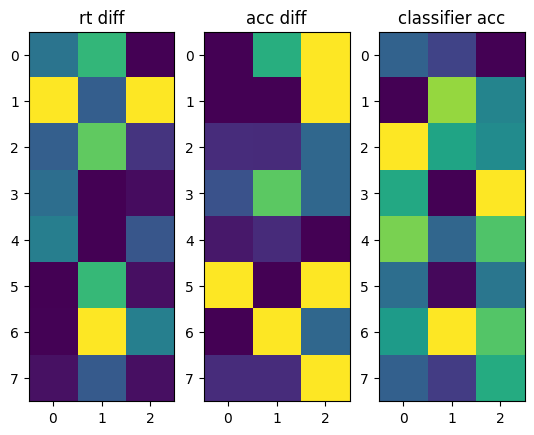

In [141]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

pdd = perf_data_diff.sort_index()
a = pd.DataFrame(accs).T.sort_index()
add = acc_data_diff.sort_index()
ax1.imshow((pdd - pdd.min())/(pdd.max() - pdd.min()), aspect='auto')
ax1.set_title('rt diff')
ax2.imshow((add - add.min())/(add.max() - add.min()), aspect='auto')
ax2.set_title('acc diff')
ax3.imshow((a - a.min())/(a.max() - a.min()), aspect='auto')
ax3.set_title('classifier acc')

Text(0.5, 1.0, 'classifier acc')

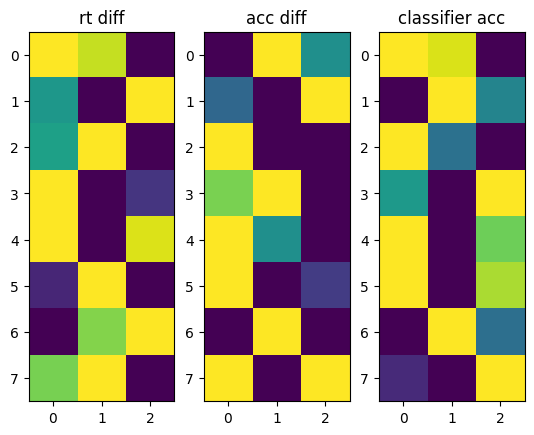

In [142]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

pdd = perf_data_diff.sort_index()
a = pd.DataFrame(accs).T.sort_index()
add = acc_data_diff.sort_index()
ax1.imshow((
    (pdd.to_numpy() - np.expand_dims(pdd.min(1).to_numpy(), 1))/(np.expand_dims(pdd.to_numpy().max(1), 1) - np.expand_dims(pdd.to_numpy().min(1), 1))
), aspect='auto')
ax1.set_title('rt diff')
ax2.imshow((
    (add.to_numpy() - np.expand_dims(add.min(1).to_numpy(), 1))/(np.expand_dims(add.to_numpy().max(1), 1) - np.expand_dims(add.to_numpy().min(1), 1))
), aspect='auto')
ax2.set_title('acc diff')
ax3.imshow((
    (a.to_numpy() - np.expand_dims(a.min(1).to_numpy(), 1))/(np.expand_dims(a.to_numpy().max(1), 1) - np.expand_dims(a.to_numpy().min(1), 1))
), aspect='auto')
ax3.set_title('classifier acc')